In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat
import numpy as np
from scipy.stats import linregress
from matplotlib.ticker import StrMethodFormatter, FuncFormatter
import seaborn as sns

# <font color='blue'> Importing Files and Data

In [2]:
tn_budgets= pd.read_csv('data/tn.movie_budgets.csv.gz')
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data shapes

In [3]:
tn_budgets.shape

(5782, 6)

# Number of Unique titles

Compare to number of rows in data shapes

In [4]:
tn_budgets['movie'].nunique() #checking number of unique titles in df

5698

In [5]:
#movies['original_title'].nunique() #checking number of unique titles in df

# <font color='blue'>Looking @ IMDB SQL file

In [6]:
!ls Data #checking data in folder

bom.movie_gross.csv.gz  im.db.zip               rt.reviews.tsv.gz
im.db                   movie_data_erd.jpeg     tmdb.movies.csv.gz
im.db.gz                rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz


In [7]:
#create connection
con = sqlite3.connect('data/im.db')

# Table 1 - IMDB ratings


In [8]:
imdb_ratings = pd.read_sql(""" SELECT * FROM movie_ratings
""", con)
imdb_ratings.head(15)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [9]:
imdb_ratings.shape #looking at the shape

(73856, 3)

# Table 2 - IMDB Basics

In [10]:
#table 2
imdb_basics = pd.read_sql("""
SELECT *
FROM movie_basics

""", con)

imdb_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [11]:
imdb_basics.shape ##looking at the shape

(146144, 6)

# Table 3 - IMDB akas

In [12]:
#table 3
imdb_akas = pd.read_sql("""
SELECT *
FROM movie_akas

""", con)

imdb_akas.head(50)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [13]:
imdb_akas.shape ##looking at the shape

(331703, 8)

# <font color='blue'>Merging IMDB SQL Tables together

**Selecting imdb_akas rows that are from region US and grouping by movie_id**

In [14]:
imdb_akas_us = pd.read_sql('''
SELECT *
FROM movie_akas
WHERE region = 'US'
GROUP BY movie_id
''', con)
imdb_akas_us.shape

(47433, 8)

taking imdb_basics

In [15]:
# m_basics = pd.read_sql('''
# SELECT *
# FROM movie_basics
# WHERE length(movie_id) = 9
# ''', con)
# m_basics.shape

**Inner merging idmb_ratings to modified idmb_akas table**

In [16]:
akas_basics_merge = imdb_akas_us.merge(imdb_basics, on='movie_id',
                                        how='inner')

**Left join IMDB ratings to imdb akas**

In [17]:
imdb_merged = akas_basics_merge.merge(imdb_ratings, on='movie_id',
                                       how='left')

#  <font color='blue'>Creating Joined Data Table for All</font>

## Cleaning up data frames to properly join!
- Removing unnecessary columns: language, types, attributes
- Cleaning up date columns for proper joins
- Removing duplicates

<font color='red'> SQL Data Table Cleanup </font>

In [18]:
#Removing language and types because mostly null values
#Removing attributes bc not a need column

imdb_merged.drop(labels =['language','types','attributes'] , axis = 1, inplace = True) 

In [19]:
imdb_merged.shape

(47433, 12)

In [20]:
imdb_merged.nunique()

movie_id             47433
ordering                43
title                45308
region                   1
is_original_title        2
primary_title        45341
original_title       45449
start_year              17
runtime_minutes        290
genres                 850
averagerating           90
numvotes              5325
dtype: int64

In [21]:
#Removing dublicates if they match in runtime minutes and primary title
#imdb_merged.drop_duplicates(subset = ['primary_title', 'runtime_minutes'], inplace= True)

In [22]:
#Checking duplicates 
imdb_merged.loc[imdb_merged['title'] == 'Aladdin']
##only one Aladdin appearing now! Yay! 

,movie_id,ordering,title,region,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
40613,tt6139732,13,Aladdin,US,0.0,Aladdin,Aladdin,2019,128.0,"Adventure,Comedy,Family",7.4,57549.0


<font color='red'> Movie Budgets Table Cleanup </font>

In [23]:
#renaming movie title for ease of joining
tn_budgets.rename(columns = {'movie': 'primary_title'}, inplace = True) 

In [24]:
tn_budgets.loc[tn_budgets['primary_title'] == 'Aladdin'] 
#see here that there are 2 aladdins but they are from 2 seperate years
#this will be an issue for when we merge if we dont merge by year + title match

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
80,81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
2032,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"


- need to merge on 2 columns i.e. start year and title column bc dupe movies diff years. 
- Can be a list to merge

In [25]:
#Creating new coumn called year that is date.time
tn_budgets['Release_Date_Time'] = pd.to_datetime(tn_budgets['release_date'])
tn_budgets['start_year'] = tn_budgets['Release_Date_Time'].dt.year

In [26]:
tn_budgets['month'] = tn_budgets['Release_Date_Time'].dt.month#.astype(str)

In [27]:
##taking sql_df_US, tn_budgets, movies and creating one table
#full_movies_df = imdb_merged.merge(tn_budgets, left_on= ['primary_title', 'start_year'],right_on= ['primary_title', 'year'], how= 'inner')

full_movies_df = imdb_merged.merge(tn_budgets, on= ['primary_title','start_year'], how= 'inner')



In [28]:
# Checking shape
full_movies_df.shape

(1340, 19)

In [29]:
full_movies_df

,movie_id,ordering,title,region,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,month
0,tt0249516,2,Foodfight!,US,0.0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012","$45,000,000",$0,"$73,706",2012-12-31,12
1,tt0359950,25,The Secret Life of Walter Mitty,US,0.0,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183",2013-12-25,12
2,tt0365907,20,A Walk Among the Tombstones,US,0.0,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587",2014-09-19,9
3,tt0369610,21,Jurassic World 3D,US,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864",2015-06-12,6
4,tt0376136,16,Hunter S. Thompson's The Rum Diary,US,0.0,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011","$45,000,000","$13,109,815","$21,544,732",2011-10-28,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,tt8155288,16,Happy Death Day 2U,US,0.0,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019","$9,000,000","$28,051,045","$64,179,495",2019-02-13,2
1336,tt8266310,1,Blinded by the Light,US,0.0,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173.0,64,"Aug 14, 2019","$15,000,000",$0,$0,2019-08-14,8
1337,tt8364368,5,Crawl,US,0.0,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",NaN,NaN,16,"Jul 12, 2019","$17,000,000",$0,$0,2019-07-12,7
1338,tt8632862,6,Fahrenheit 11/9,US,0.0,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018","$5,000,000","$6,352,306","$6,653,715",2018-09-21,9


# Keanan's Personal data cleaning and project

# <font color='blue'>Droping excess columns
- All movies are already in US region and for that reason I am dropping region
- I am removing extra title columns
- Release date, start year not needed for my analysis 

In [30]:
full_movies_df.drop(labels =['title','original_title','region','start_year','Release_Date_Time','is_original_title'] , axis = 1, inplace = True) 

# <font color='blue'> Adding profit margin to full_movies </font>

<font color='red'> First remove $ and , from budget and gross and then change dtype to float </font>

In [31]:
# Check columns dtype
full_movies_df['worldwide_gross'].dtype

dtype('O')

In [32]:
# removing $ and commas and then convert to float
full_movies_df['worldwide_gross'] = full_movies_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype(float)
full_movies_df['production_budget'] = full_movies_df['production_budget'].str.replace('$','').str.replace(',','').astype(float)
full_movies_df['domestic_gross'] = full_movies_df['domestic_gross'].str.replace('$','').str.replace(',','').astype(float)

<font color='red'>Make new Df where gross and budget has no zeroes

In [33]:
full_movies_profit_df = full_movies_df.loc[full_movies_df['production_budget']!= 0].loc[full_movies_df['worldwide_gross']!=0]
full_movies_profit_df

,movie_id,ordering,primary_title,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,month
0,tt0249516,2,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012",45000000.0,0.0,7.370600e+04,12
1,tt0359950,25,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013",91000000.0,58236838.0,1.878612e+08,12
2,tt0365907,20,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014",28000000.0,26017685.0,6.210859e+07,9
3,tt0369610,21,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,6
4,tt0376136,16,The Rum Diary,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011",45000000.0,13109815.0,2.154473e+07,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,tt7784604,9,Hereditary,127.0,"Drama,Horror,Mystery",7.3,151571.0,56,"Jun 8, 2018",10000000.0,44069456.0,7.013390e+07,6
1334,tt7959026,23,The Mule,116.0,"Crime,Drama,Thriller",7.1,58955.0,100,"Dec 14, 2018",50000000.0,103804407.0,1.708577e+08,12
1335,tt8155288,16,Happy Death Day 2U,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019",9000000.0,28051045.0,6.417950e+07,2
1338,tt8632862,6,Fahrenheit 11/9,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018",5000000.0,6352306.0,6.653715e+06,9


<font color='red'>Create profit column

In [34]:
full_movies_profit_df['profit'] = full_movies_profit_df['worldwide_gross'] - full_movies_profit_df['production_budget']


<font color='red'>Create profit_margin column

In [35]:
full_movies_profit_df['profit_margin'] = (full_movies_profit_df['profit'] / full_movies_profit_df['worldwide_gross']) * 100


In [36]:
full_movies_profit_df

,movie_id,ordering,primary_title,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,month,profit,profit_margin
0,tt0249516,2,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012",45000000.0,0.0,7.370600e+04,12,-4.492629e+07,-60953.374216
1,tt0359950,25,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013",91000000.0,58236838.0,1.878612e+08,12,9.686118e+07,51.559977
2,tt0365907,20,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014",28000000.0,26017685.0,6.210859e+07,9,3.410859e+07,54.917667
3,tt0369610,21,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,6,1.433855e+09,86.960647
4,tt0376136,16,The Rum Diary,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011",45000000.0,13109815.0,2.154473e+07,10,-2.345527e+07,-108.867764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,tt7784604,9,Hereditary,127.0,"Drama,Horror,Mystery",7.3,151571.0,56,"Jun 8, 2018",10000000.0,44069456.0,7.013390e+07,6,6.013390e+07,85.741561
1334,tt7959026,23,The Mule,116.0,"Crime,Drama,Thriller",7.1,58955.0,100,"Dec 14, 2018",50000000.0,103804407.0,1.708577e+08,12,1.208577e+08,70.735877
1335,tt8155288,16,Happy Death Day 2U,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019",9000000.0,28051045.0,6.417950e+07,2,5.517950e+07,85.976830
1338,tt8632862,6,Fahrenheit 11/9,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018",5000000.0,6352306.0,6.653715e+06,9,1.653715e+06,24.854010


In [37]:
full_movies_profit_df.shape

(1239, 15)

In [38]:
full_movies_profit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 0 to 1339
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1239 non-null   object 
 1   ordering           1239 non-null   int64  
 2   primary_title      1239 non-null   object 
 3   runtime_minutes    1236 non-null   float64
 4   genres             1239 non-null   object 
 5   averagerating      1228 non-null   float64
 6   numvotes           1228 non-null   float64
 7   id                 1239 non-null   int64  
 8   release_date       1239 non-null   object 
 9   production_budget  1239 non-null   float64
 10  domestic_gross     1239 non-null   float64
 11  worldwide_gross    1239 non-null   float64
 12  month              1239 non-null   int64  
 13  profit             1239 non-null   float64
 14  profit_margin      1239 non-null   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 154.9+ KB


# Note on Profit and Profit Margin 

Profit and profit margin were both calculated in this however it is in accurate and misleading. Production Budget represents the budget allocated for filming. This can be exceed and while this is rare the greater issue is that production budget does not include additional expenses. These can be costs to show movie in theaters, marketing, promotion. The Numbers has estimated these expenses to be in the hundreds of millions for large budget films like Frozen. All charts and plots using profit and profit margin were removed if used in a misleading context.

# <font color='blue'> Ploting production budget to worldwide gross revenue

This plot shows a scatter plot between production budget and worldwide gross revenue.

Slope: 0.1836702649494115
Intercept: 20705038.32701435
Correlation: (r) 0.7764641907664722


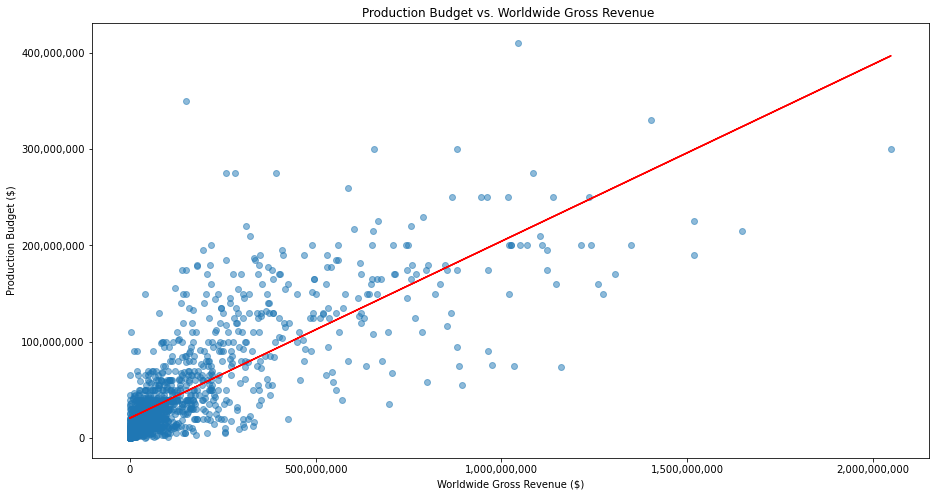

In [39]:
y = full_movies_profit_df['production_budget']
x = full_movies_profit_df['worldwide_gross']
fig, ax = plt.subplots(figsize=(15,8))


ax.scatter(x,y,alpha=0.5)


ax.set_xlabel("Worldwide Gross Revenue ($)")
ax.set_ylabel("Production Budget ($)")
ax.set_title("Production Budget vs. Worldwide Gross Revenue ");
# Removing scientific notation
ax.ticklabel_format(useOffset=False, style='plain')

# Set the major formatter and use fstring notation to adjust the axes
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

slope, intercept, r, p, se = linregress(x,y)
lin_r = linregress(x, y)
plt.plot(x, lin_r.intercept + lin_r.slope*x, 'r')

print('Slope:', slope)
print('Intercept:', intercept)
print('Correlation: (r)', r)
plt.savefig('./Keanan_plots/budget_wwgross_scatter.png', dpi=100)

# Creating bins and finding mean of each bin

I created 5 bins that represent the 25th to 75th quintile. The 6th bin are outliers and includes the majority of the movies and doesn't skew the data. The reason for using 5 bins is due to the impact of outliers on a bin if bin size was reduced and number of bins increased. Each bin represents a budget range. The plot shows that mean production budget increases at a relativly linear rate. While mean worldwide gross revenue increases at more of a exponential rate. The relatinoship of this means that highe rbudgets ismorelikley to yield higher worldwide gross revenues. Based on this Microsoft should aim for a production budget greater then 65 million. 

<ipython-input-40-a8fec1f0e306>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['11M-21.8M',


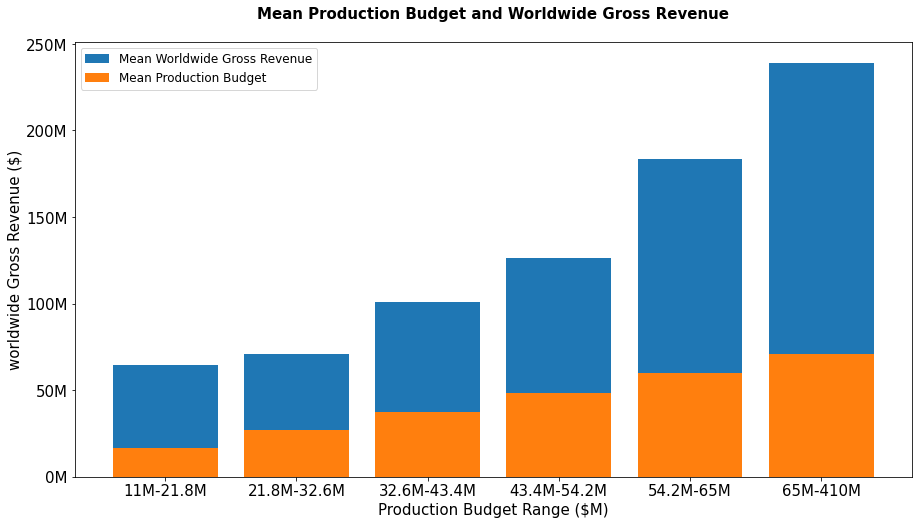

In [40]:
q1 = np.percentile(full_movies_profit_df["production_budget"],25)
q3 = np.percentile(full_movies_profit_df["production_budget"],75)
iqr = q3 - q1

bin_width = iqr / 5
# make array of bin edges, start = q1, stop = q3 +1 , count by bin_width)
bin_edge = np.arange(q1, q3+1, bin_width)

# .cut to make bins
full_movies_profit_df['budget_range'] = pd.cut(full_movies_profit_df['production_budget'], bins= bin_edge)

# casting budget_range as str
full_movies_profit_df['budget_range'] = full_movies_profit_df['budget_range'].astype(str)


# Creating new DF using groupby and agg
grouped_full_movies_profit_df = full_movies_profit_df.groupby('budget_range').agg(
    {'worldwide_gross': 'mean', 
     'production_budget': 'mean'}).reset_index()

# adjust fig size
fig, ax = plt.subplots(figsize=(15,8))

#creating stacked bar
ax.bar(grouped_full_movies_profit_df['budget_range'],grouped_full_movies_profit_df['worldwide_gross'],
       width=0.8,
       label='Mean Worldwide Gross Revenue')
ax.bar(grouped_full_movies_profit_df['budget_range'],grouped_full_movies_profit_df['production_budget'],
       width=0.8,
       label='Mean Production Budget')

ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M'))


ax.set_xticklabels(['11M-21.8M',
                    '21.8M-32.6M',
                    '32.6M-43.4M',
                    '43.4M-54.2M',
                    '54.2M-65M',
                    '65M-410M'])

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
ax.set_xlabel("Production Budget Range ($M)", fontsize=15)
ax.set_ylabel("worldwide Gross Revenue ($)",fontsize=15)
ax.set_title("Mean Production Budget and Worldwide Gross Revenue\n",
             fontsize=15,
             fontweight='bold')
ax.legend(fontsize=12);
plt.savefig('./Keanan_plots/Budget_revenue.png', dpi=100)

### Checking bin accuracy and information
- bin edges
- bin sizes
- film counts in each bin
- production budget in each range

In [41]:
bin_edge

array([11000000., 21800000., 32600000., 43400000., 54200000., 65000000.])

In [42]:
full_movies_profit_df['budget_range'].value_counts()

nan                         619
(11000000.0, 21800000.0]    201
(21800000.0, 32600000.0]    157
(32600000.0, 43400000.0]    131
(54200000.0, 65000000.0]     68
(43400000.0, 54200000.0]     63
Name: budget_range, dtype: int64

In [43]:
full_movies_profit_df['production_budget'].sort_values()

698         25000.0
1175        27000.0
586         40000.0
457         50000.0
1179        50000.0
           ...     
879     300000000.0
109     300000000.0
890     330600000.0
1303    350000000.0
277     410600000.0
Name: production_budget, Length: 1239, dtype: float64

In [44]:
grouped_full_movies_profit_df

,budget_range,worldwide_gross,production_budget
0,"(11000000.0, 21800000.0]",6.457803e+07,1.659851e+07
1,"(21800000.0, 32600000.0]",7.067657e+07,2.727389e+07
2,"(32600000.0, 43400000.0]",1.008875e+08,3.768168e+07
3,"(43400000.0, 54200000.0]",1.264816e+08,4.834444e+07
4,"(54200000.0, 65000000.0]",1.835573e+08,5.982647e+07
5,nan,2.391777e+08,7.073225e+07


## Plot showing best market

This plot shows the international market produce signifcantly more revenue then Domestic. Therefore our focus is on a worldwide market

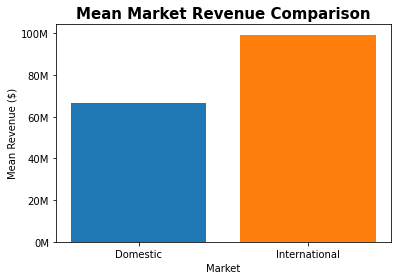

In [67]:
fig, ax = plt.subplots(figsize=(6,4))

ax.bar('Domestic',full_movies_profit_df['domestic_gross'].mean(),width=0.8)
ax.bar('International',(full_movies_profit_df['worldwide_gross']- full_movies_profit_df['domestic_gross']).mean(),width=0.8)
# ax.bar('Worldwide',(full_movies_profit_df['worldwide_gross']).mean(),width=0.8)

ax.ticklabel_format(style='plain', axis='y')


# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}M'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M'))


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
ax.set_xlabel("Market", fontsize=10)
ax.set_ylabel("Mean Revenue ($)",fontsize=10)
ax.set_title("Mean Market Revenue Comparison",fontsize=15,fontweight='bold');

plt.savefig('./Keanan_plots/domestic_vs_Worldwide.png', dpi=100)

# Further Analysis

Below determines which key insight correlates highest with positive worldwide gross revenue
worldwide gross will have the strongest correlation with itself and there must be ignored. Production budgets is the highest correlating variable to worldwide gross closley followed by genre.

<ipython-input-63-b37528de06cc>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Production Budget',


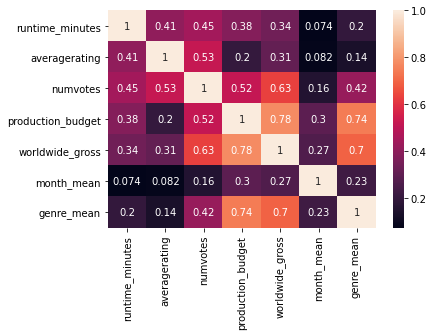

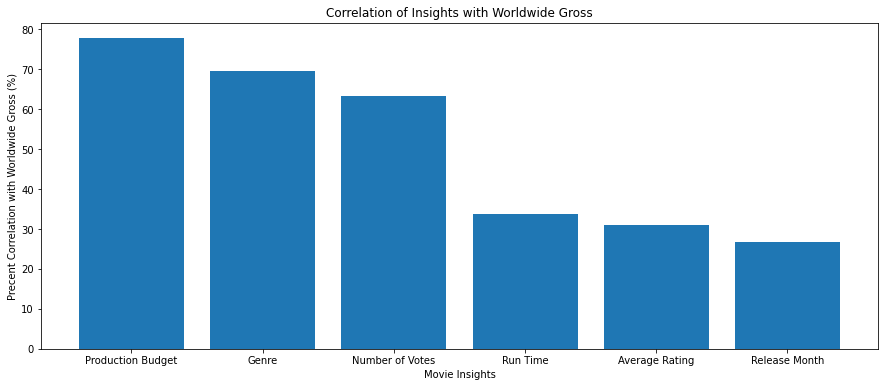

In [63]:
#creating mean revenue per genre
genre_mean_gross = full_movies_profit_df.groupby('genres')['worldwide_gross'].mean()
full_movies_profit_df['genre_mean'] = full_movies_profit_df['genres'].map(genre_mean_gross)

#creating mean revenue per month
monthly_mean_gross = full_movies_profit_df.groupby('month').agg({'worldwide_gross': 'mean'}).reset_index()
full_movies_profit_df['month_mean'] = full_movies_profit_df['month'].map(monthly_mean_gross.set_index('month')['worldwide_gross'])

corr_cols =['runtime_minutes', 'averagerating', 'numvotes', 'production_budget', 'worldwide_gross','month_mean','genre_mean']
corr_df = full_movies_profit_df[corr_cols]

#Drop null values from corr_df (I checked before 11 null rows)
corr_df_clean = corr_df.dropna()

# create a correlation matrix
corr_matrix = corr_df_clean.corr()

# use seaborn to create heat map
sns.heatmap(corr_matrix, annot=True);
# create bar plot
fig, ax = plt.subplots(figsize=(15,6))


corr_matrix_sorted = corr_matrix['worldwide_gross'].sort_values(ascending=False)
ax.set_xticklabels(['Production Budget',
                    'Genre',
                    'Number of Votes',
                    'Run Time',
                    'Average Rating',
                   'Release Month'])
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.bar(corr_matrix_sorted.index[1:], corr_matrix_sorted.values[1:]*100)
ax.set_xlabel('Movie Insights')
ax.set_ylabel('Precent Correlation with Worldwide Gross (%)')
ax.set_title('Correlation of Insights with Worldwide Gross');
plt.savefig('./Keanan_plots/insight_corr.png', dpi=100)

In [58]:
corr_matrix_sorted.index[1:]

Index(['production_budget', 'genre_mean', 'numvotes', 'runtime_minutes',
       'averagerating', 'month_mean'],
      dtype='object')

In [48]:
monthly_mean_gross

,month,worldwide_gross
0,1,7.151677e+07
1,2,1.535685e+08
2,3,1.898056e+08
3,4,1.775114e+08
4,5,2.801692e+08
5,6,2.515838e+08
6,7,2.254396e+08
7,8,1.050592e+08
8,9,7.479454e+07
9,10,8.792333e+07


In [49]:
full_movies_profit_df

,movie_id,ordering,primary_title,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,month,profit,profit_margin,budget_range,genre_mean,month_mean
0,tt0249516,2,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012",45000000.0,0.0,7.370600e+04,12,-4.492629e+07,-60953.374216,"(43400000.0, 54200000.0]",2.223053e+08,1.772553e+08
1,tt0359950,25,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013",91000000.0,58236838.0,1.878612e+08,12,9.686118e+07,51.559977,nan,8.766577e+07,1.772553e+08
2,tt0365907,20,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014",28000000.0,26017685.0,6.210859e+07,9,3.410859e+07,54.917667,"(21800000.0, 32600000.0]",5.635247e+07,7.479454e+07
3,tt0369610,21,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,6,1.433855e+09,86.960647,nan,6.707222e+08,2.515838e+08
4,tt0376136,16,The Rum Diary,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011",45000000.0,13109815.0,2.154473e+07,10,-2.345527e+07,-108.867764,"(43400000.0, 54200000.0]",5.129731e+07,8.792333e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,tt7784604,9,Hereditary,127.0,"Drama,Horror,Mystery",7.3,151571.0,56,"Jun 8, 2018",10000000.0,44069456.0,7.013390e+07,6,6.013390e+07,85.741561,nan,6.806660e+07,2.515838e+08
1334,tt7959026,23,The Mule,116.0,"Crime,Drama,Thriller",7.1,58955.0,100,"Dec 14, 2018",50000000.0,103804407.0,1.708577e+08,12,1.208577e+08,70.735877,"(43400000.0, 54200000.0]",5.163475e+07,1.772553e+08
1335,tt8155288,16,Happy Death Day 2U,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019",9000000.0,28051045.0,6.417950e+07,2,5.517950e+07,85.976830,nan,6.806660e+07,1.535685e+08
1338,tt8632862,6,Fahrenheit 11/9,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018",5000000.0,6352306.0,6.653715e+06,9,1.653715e+06,24.854010,nan,3.480035e+07,7.479454e+07


Slope: 0.06993667411247083
Intercept: 154480525.5101569
Correlation: (r) 0.26445542934958033


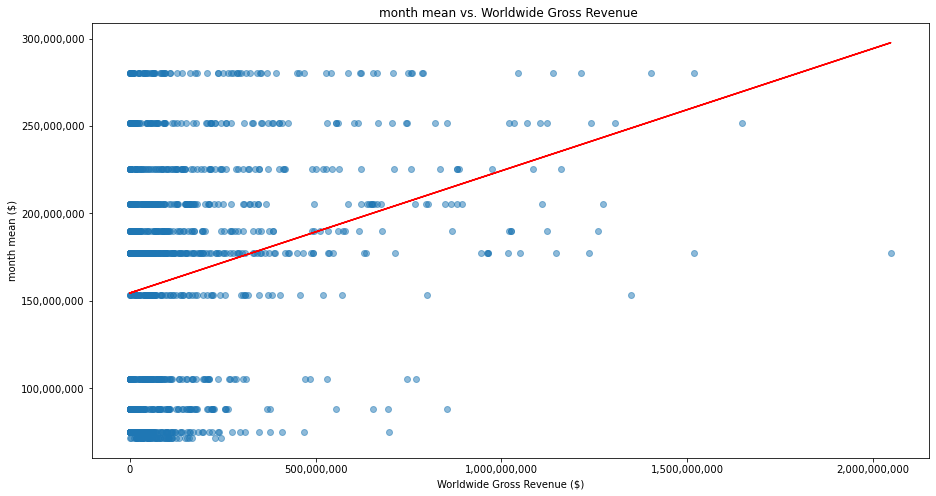

In [55]:
y = full_movies_profit_df['month_mean']
x = full_movies_profit_df['worldwide_gross']
fig, ax = plt.subplots(figsize=(15,8))


ax.scatter(x,y,alpha=0.5)


ax.set_xlabel("Worldwide Gross Revenue ($)")
ax.set_ylabel("month mean ($)")
ax.set_title("month mean vs. Worldwide Gross Revenue ");
# Removing scientific notation
ax.ticklabel_format(useOffset=False, style='plain')

# Set the major formatter and use fstring notation to adjust the axes
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

slope, intercept, r, p, se = linregress(x,y)
lin_r = linregress(x, y)
plt.plot(x, lin_r.intercept + lin_r.slope*x, 'r')

print('Slope:', slope)
print('Intercept:', intercept)
print('Correlation: (r)', r)
plt.savefig('./Keanan_plots/budget_wwgross_scatter.png', dpi=100)